In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import math

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = {
    'Population': [47351567, 1664182, 345678, 987654, 1234567, 876543, 234567],
    'Description': [
        "Spain is known for its architecture and cuisine.",
        "Barcelona is a vibrant city with art and history.",
        "Madrid is the capital and has many museums.",
        "Seville is famous for flamenco dancing.",
        "Valencia is known for its City of Arts and Sciences.",
        "Bilbao is home to the Guggenheim Museum.",
        "Toledo is a historic city with medieval architecture."
    ]
}

df = pd.DataFrame(data)
df.to_csv('spain.csv', index=False)  # Saves the file
df.head()


,Population,Description
0,47351567,Spain is known for its architecture and cuisine.
1,1664182,Barcelona is a vibrant city with art and history.
2,345678,Madrid is the capital and has many museums.
3,987654,Seville is famous for flamenco dancing.
4,1234567,Valencia is known for its City of Arts and Sci...


In [ ]:
df = pd.read_csv('spain.csv')
df.head()


,Population,Description
0,47351567,Spain is known for its architecture and cuisine.
1,1664182,Barcelona is a vibrant city with art and history.
2,345678,Madrid is the capital and has many museums.
3,987654,Seville is famous for flamenco dancing.
4,1234567,Valencia is known for its City of Arts and Sci...


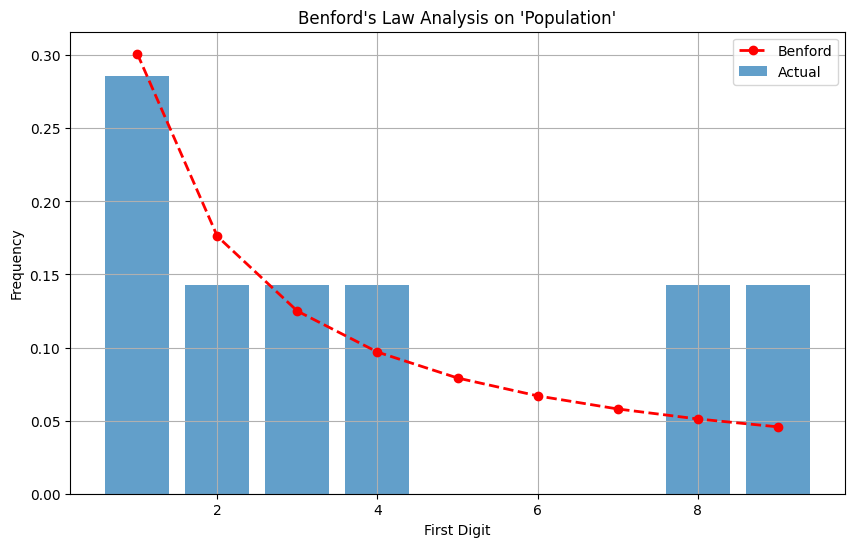

In [ ]:
def get_first_digits(series):
    first_digits = []
    for val in series.dropna():
        try:
            num = abs(float(val))
            digit = str(num)[0]
            if digit.isdigit() and digit != '0':
                first_digits.append(int(digit))
        except:
            continue
    return first_digits

column = 'Population'  # Our numeric column
first_digits = get_first_digits(df[column])

# Count frequency
actual_counts = Counter(first_digits)
total = sum(actual_counts.values())
actual_freq = [actual_counts.get(d, 0)/total for d in range(1, 10)]

# Benford expected
benford_freq = [np.log10(1 + 1/d) for d in range(1, 10)]

# Plot
digits = range(1, 10)
plt.figure(figsize=(10,6))
plt.bar(digits, actual_freq, label='Actual', alpha=0.7)
plt.plot(digits, benford_freq, 'ro--', label='Benford', linewidth=2)
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title(f"Benford's Law Analysis on '{column}'")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Sample data
data = {
    'Population': [47351567, 1664182, 345678, 987654, 1234567, 876543, 234567],
    'Description': [
        "Spain is known for its architecture and cuisine.",
        "Barcelona is a vibrant city with art and history.",
        "Madrid is the capital and has many museums.",
        "Seville is famous for flamenco dancing.",
        "Valencia is known for its City of Arts and Sciences.",
        "Bilbao is home to the Guggenheim Museum.",
        "Toledo is a historic city with medieval architecture."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Combine all descriptions into one large string
text = ' '.join(df['Description'].astype(str))

# Process the text with spaCy
doc = nlp(text)

# Tokenize and filter out stopwords and non-alphabetical tokens
tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]

print(tokens[:10])  # Sample output of the first 10 tokens


['Spain', 'known', 'architecture', 'cuisine', 'Barcelona', 'vibrant', 'city', 'art', 'history', 'Madrid']


<ipython-input-41-7b268d8971ee>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Visitors (Thousands)', y='Attraction', data=df_pune_attractions, palette='coolwarm')


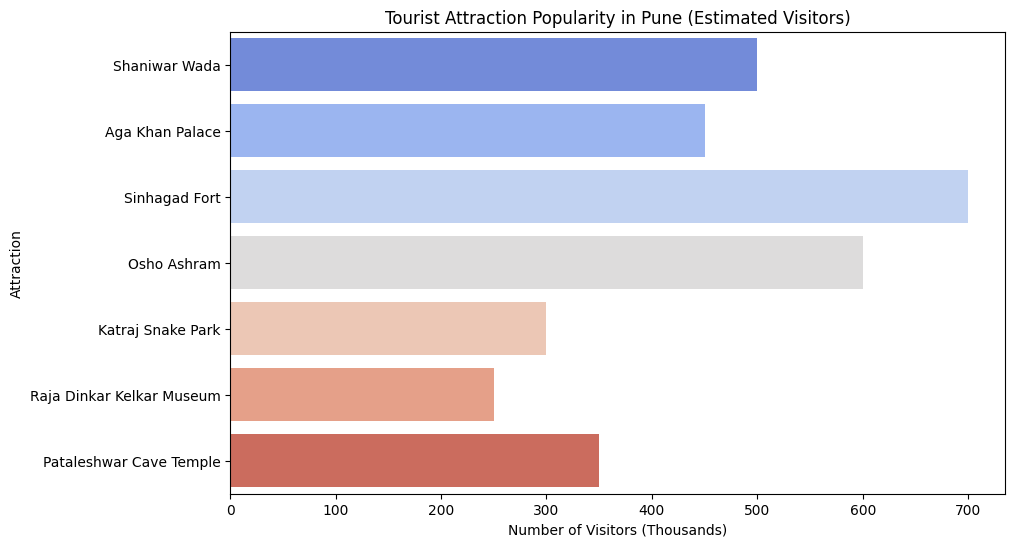

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for tourist attractions in Pune (Estimated popularity)
attractions_pune = {
    'Attraction': ['Shaniwar Wada', 'Aga Khan Palace', 'Sinhagad Fort', 'Osho Ashram',
                   'Katraj Snake Park', 'Raja Dinkar Kelkar Museum', 'Pataleshwar Cave Temple'],
    'Visitors (Thousands)': [500, 450, 700, 600, 300, 250, 350]  # Hypothetical numbers
}

# Convert to DataFrame
df_pune_attractions = pd.DataFrame(attractions_pune)

# Plot a bar chart for the popularity of tourist attractions
plt.figure(figsize=(10, 6))
sns.barplot(x='Visitors (Thousands)', y='Attraction', data=df_pune_attractions, palette='coolwarm')
plt.title('Tourist Attraction Popularity in Pune (Estimated Visitors)')
plt.xlabel('Number of Visitors (Thousands)')
plt.ylabel('Attraction')
plt.show()
